In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch import from_numpy, optim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

torch.manual_seed(1234)

In [2]:
def normalize(X, mu=None, sigma=None):
    if mu is None and sigma is None:
        mu = X.mean(axis=0)
        sigma = X.std(axis=0)
    return (X - mu)/sigma, mu, sigma

In [3]:
class ParkinsonsTrainDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt('./parkinsons_updrs.data',
                        delimiter=',', skiprows=1, dtype=np.float32)
        train_len = int(xy.shape[0] * 0.7)
        train_xy = xy[:train_len]
        self.len = train_xy.shape[0]
        y_label_indx = [5, 6]
        self.train_x = np.delete(train_xy, y_label_indx, axis=1)
        self.train_x = torch.from_numpy(self.train_x)
        self.train_y = torch.from_numpy(train_xy[:, y_label_indx[0]: y_label_indx
        [1] + 1])
        
        self.train_x, mu, sigma = normalize(self.train_x)
        self.train_y, mu, sigma = normalize(self.train_y)

    def __getitem__(self, index):
        return self.train_x[index], self.train_y[index]

    def __len__(self):
        return self.len

class ParkinsonsTestDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt('./parkinsons_updrs.data',
                        delimiter=',', skiprows=1, dtype=np.float32)
        train_len = int(xy.shape[0] * 0.7)
        test_xy = xy[train_len:]
        self.len = test_xy.shape[0]

        y_label_indx = [5, 6]
        self.test_x = np.delete(test_xy, y_label_indx, axis=1)
        self.test_x = torch.from_numpy(self.test_x)
        self.test_y = torch.from_numpy(test_xy[:, y_label_indx[0]: y_label_indx
        [1] + 1])
        
        self.test_x, mu, sigma = normalize(self.test_x)
        self.test_y, mu, sigma = normalize(self.test_y)

    def __getitem__(self, index):
        return self.test_x[index], self.test_y[index]

    def __len__(self):
        return self.len

train_dataset = ParkinsonsTrainDataset()
test_dataset = ParkinsonsTestDataset()


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=0, drop_last=True)
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=32,
                          num_workers=0)


In [4]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(20, 300) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(300, 2)  
    
    def forward(self, x):
        out1 = self.l1(x)
        out2 = self.relu(out1)
        out = self.l2(out2)
        return out

model = Model()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [5]:
for epoch in range(30):
    for i, data in enumerate(train_loader):
        inputs, labels = data

        y_pred = model(inputs)

        motor_updrs_mse = criterion(y_pred[:, 0], labels[:, 0])
        total_updrs_mse= criterion(y_pred[:, 1], labels[:, 1])

        total_loss = 3 * motor_updrs_mse + total_updrs_mse
        
        print(f'Epoch {epoch + 1} | Step: {i+1} | Loss: {total_loss.item():.4f}')

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

Epoch 1 | Step: 1 | Loss: 3.1491
Epoch 1 | Step: 2 | Loss: 2.7927
Epoch 1 | Step: 3 | Loss: 4.5199
Epoch 1 | Step: 4 | Loss: 2.6819
Epoch 1 | Step: 5 | Loss: 2.5432
Epoch 1 | Step: 6 | Loss: 3.4362
Epoch 1 | Step: 7 | Loss: 6.3725
Epoch 1 | Step: 8 | Loss: 2.4417
Epoch 1 | Step: 9 | Loss: 3.5389
Epoch 1 | Step: 10 | Loss: 5.9428
Epoch 1 | Step: 11 | Loss: 2.5269
Epoch 1 | Step: 12 | Loss: 3.3163
Epoch 1 | Step: 13 | Loss: 3.3028
Epoch 1 | Step: 14 | Loss: 3.9892
Epoch 1 | Step: 15 | Loss: 2.7228
Epoch 1 | Step: 16 | Loss: 3.5326
Epoch 1 | Step: 17 | Loss: 3.0878
Epoch 1 | Step: 18 | Loss: 2.7876
Epoch 1 | Step: 19 | Loss: 4.4158
Epoch 1 | Step: 20 | Loss: 5.2297
Epoch 1 | Step: 21 | Loss: 14.7799
Epoch 1 | Step: 22 | Loss: 3.7823
Epoch 1 | Step: 23 | Loss: 4.0783
Epoch 1 | Step: 24 | Loss: 3.1925
Epoch 1 | Step: 25 | Loss: 2.6304
Epoch 1 | Step: 26 | Loss: 3.4002
Epoch 1 | Step: 27 | Loss: 3.3471
Epoch 1 | Step: 28 | Loss: 3.2222
Epoch 1 | Step: 29 | Loss: 3.9894
Epoch 1 | Step: 30 | L

Epoch 3 | Step: 87 | Loss: 1.9410
Epoch 3 | Step: 88 | Loss: 1.8121
Epoch 3 | Step: 89 | Loss: 1.6975
Epoch 3 | Step: 90 | Loss: 2.2283
Epoch 3 | Step: 91 | Loss: 1.8878
Epoch 3 | Step: 92 | Loss: 1.9148
Epoch 3 | Step: 93 | Loss: 2.2554
Epoch 3 | Step: 94 | Loss: 1.7951
Epoch 3 | Step: 95 | Loss: 1.3730
Epoch 3 | Step: 96 | Loss: 1.5003
Epoch 3 | Step: 97 | Loss: 2.1048
Epoch 3 | Step: 98 | Loss: 1.7808
Epoch 3 | Step: 99 | Loss: 1.7954
Epoch 3 | Step: 100 | Loss: 2.1036
Epoch 3 | Step: 101 | Loss: 1.1415
Epoch 3 | Step: 102 | Loss: 1.5767
Epoch 3 | Step: 103 | Loss: 1.2394
Epoch 3 | Step: 104 | Loss: 1.4115
Epoch 3 | Step: 105 | Loss: 2.4677
Epoch 3 | Step: 106 | Loss: 8.1301
Epoch 3 | Step: 107 | Loss: 1.4481
Epoch 3 | Step: 108 | Loss: 1.2065
Epoch 3 | Step: 109 | Loss: 1.9491
Epoch 3 | Step: 110 | Loss: 2.0507
Epoch 3 | Step: 111 | Loss: 2.1518
Epoch 3 | Step: 112 | Loss: 1.7572
Epoch 3 | Step: 113 | Loss: 1.6113
Epoch 3 | Step: 114 | Loss: 1.4970
Epoch 3 | Step: 115 | Loss: 1.663

Epoch 6 | Step: 94 | Loss: 0.6471
Epoch 6 | Step: 95 | Loss: 1.0454
Epoch 6 | Step: 96 | Loss: 0.8400
Epoch 6 | Step: 97 | Loss: 0.9036
Epoch 6 | Step: 98 | Loss: 1.0402
Epoch 6 | Step: 99 | Loss: 0.7784
Epoch 6 | Step: 100 | Loss: 0.9806
Epoch 6 | Step: 101 | Loss: 0.8733
Epoch 6 | Step: 102 | Loss: 1.5086
Epoch 6 | Step: 103 | Loss: 1.0038
Epoch 6 | Step: 104 | Loss: 1.0515
Epoch 6 | Step: 105 | Loss: 0.8477
Epoch 6 | Step: 106 | Loss: 2.5423
Epoch 6 | Step: 107 | Loss: 1.4057
Epoch 6 | Step: 108 | Loss: 0.9667
Epoch 6 | Step: 109 | Loss: 0.9984
Epoch 6 | Step: 110 | Loss: 1.0484
Epoch 6 | Step: 111 | Loss: 1.4752
Epoch 6 | Step: 112 | Loss: 1.2457
Epoch 6 | Step: 113 | Loss: 0.8885
Epoch 6 | Step: 114 | Loss: 1.3874
Epoch 6 | Step: 115 | Loss: 0.9904
Epoch 6 | Step: 116 | Loss: 1.3448
Epoch 6 | Step: 117 | Loss: 1.0075
Epoch 6 | Step: 118 | Loss: 1.0800
Epoch 6 | Step: 119 | Loss: 1.1774
Epoch 6 | Step: 120 | Loss: 0.9172
Epoch 6 | Step: 121 | Loss: 1.3328
Epoch 6 | Step: 122 | Loss

Epoch 9 | Step: 72 | Loss: 0.9018
Epoch 9 | Step: 73 | Loss: 0.5139
Epoch 9 | Step: 74 | Loss: 0.6945
Epoch 9 | Step: 75 | Loss: 0.6291
Epoch 9 | Step: 76 | Loss: 0.8004
Epoch 9 | Step: 77 | Loss: 0.6284
Epoch 9 | Step: 78 | Loss: 0.3861
Epoch 9 | Step: 79 | Loss: 0.7713
Epoch 9 | Step: 80 | Loss: 0.7491
Epoch 9 | Step: 81 | Loss: 0.8894
Epoch 9 | Step: 82 | Loss: 2.9692
Epoch 9 | Step: 83 | Loss: 0.7551
Epoch 9 | Step: 84 | Loss: 0.6270
Epoch 9 | Step: 85 | Loss: 1.0066
Epoch 9 | Step: 86 | Loss: 0.7857
Epoch 9 | Step: 87 | Loss: 0.6606
Epoch 9 | Step: 88 | Loss: 0.6030
Epoch 9 | Step: 89 | Loss: 0.8566
Epoch 9 | Step: 90 | Loss: 0.8610
Epoch 9 | Step: 91 | Loss: 0.6785
Epoch 9 | Step: 92 | Loss: 0.6245
Epoch 9 | Step: 93 | Loss: 0.3425
Epoch 9 | Step: 94 | Loss: 0.7321
Epoch 9 | Step: 95 | Loss: 0.9674
Epoch 9 | Step: 96 | Loss: 1.2982
Epoch 9 | Step: 97 | Loss: 0.5649
Epoch 9 | Step: 98 | Loss: 0.9320
Epoch 9 | Step: 99 | Loss: 0.6247
Epoch 9 | Step: 100 | Loss: 0.7636
Epoch 9 | Ste

Epoch 12 | Step: 77 | Loss: 0.3458
Epoch 12 | Step: 78 | Loss: 0.4804
Epoch 12 | Step: 79 | Loss: 0.4586
Epoch 12 | Step: 80 | Loss: 0.3274
Epoch 12 | Step: 81 | Loss: 0.7879
Epoch 12 | Step: 82 | Loss: 0.6206
Epoch 12 | Step: 83 | Loss: 0.6166
Epoch 12 | Step: 84 | Loss: 0.7940
Epoch 12 | Step: 85 | Loss: 0.4207
Epoch 12 | Step: 86 | Loss: 0.4954
Epoch 12 | Step: 87 | Loss: 0.5776
Epoch 12 | Step: 88 | Loss: 0.5918
Epoch 12 | Step: 89 | Loss: 0.5202
Epoch 12 | Step: 90 | Loss: 0.6109
Epoch 12 | Step: 91 | Loss: 0.5363
Epoch 12 | Step: 92 | Loss: 0.5529
Epoch 12 | Step: 93 | Loss: 0.3735
Epoch 12 | Step: 94 | Loss: 0.4226
Epoch 12 | Step: 95 | Loss: 0.6790
Epoch 12 | Step: 96 | Loss: 0.5075
Epoch 12 | Step: 97 | Loss: 0.4877
Epoch 12 | Step: 98 | Loss: 0.5220
Epoch 12 | Step: 99 | Loss: 0.6894
Epoch 12 | Step: 100 | Loss: 0.4619
Epoch 12 | Step: 101 | Loss: 0.4381
Epoch 12 | Step: 102 | Loss: 0.4561
Epoch 12 | Step: 103 | Loss: 0.6081
Epoch 12 | Step: 104 | Loss: 0.4152
Epoch 12 | Step

Epoch 15 | Step: 44 | Loss: 0.3060
Epoch 15 | Step: 45 | Loss: 0.2543
Epoch 15 | Step: 46 | Loss: 1.3441
Epoch 15 | Step: 47 | Loss: 0.4164
Epoch 15 | Step: 48 | Loss: 0.4319
Epoch 15 | Step: 49 | Loss: 0.7102
Epoch 15 | Step: 50 | Loss: 0.5415
Epoch 15 | Step: 51 | Loss: 0.3426
Epoch 15 | Step: 52 | Loss: 0.3037
Epoch 15 | Step: 53 | Loss: 0.2325
Epoch 15 | Step: 54 | Loss: 0.5181
Epoch 15 | Step: 55 | Loss: 0.4200
Epoch 15 | Step: 56 | Loss: 0.3928
Epoch 15 | Step: 57 | Loss: 0.4443
Epoch 15 | Step: 58 | Loss: 0.8784
Epoch 15 | Step: 59 | Loss: 0.3521
Epoch 15 | Step: 60 | Loss: 0.4297
Epoch 15 | Step: 61 | Loss: 0.4909
Epoch 15 | Step: 62 | Loss: 0.3034
Epoch 15 | Step: 63 | Loss: 0.6421
Epoch 15 | Step: 64 | Loss: 0.2314
Epoch 15 | Step: 65 | Loss: 0.4493
Epoch 15 | Step: 66 | Loss: 0.4415
Epoch 15 | Step: 67 | Loss: 0.3488
Epoch 15 | Step: 68 | Loss: 0.3026
Epoch 15 | Step: 69 | Loss: 0.3936
Epoch 15 | Step: 70 | Loss: 0.3344
Epoch 15 | Step: 71 | Loss: 0.5185
Epoch 15 | Step: 72 

Epoch 17 | Step: 63 | Loss: 0.4146
Epoch 17 | Step: 64 | Loss: 0.3831
Epoch 17 | Step: 65 | Loss: 0.3455
Epoch 17 | Step: 66 | Loss: 0.2951
Epoch 17 | Step: 67 | Loss: 0.4150
Epoch 17 | Step: 68 | Loss: 0.3194
Epoch 17 | Step: 69 | Loss: 0.4601
Epoch 17 | Step: 70 | Loss: 0.3228
Epoch 17 | Step: 71 | Loss: 0.2965
Epoch 17 | Step: 72 | Loss: 0.4270
Epoch 17 | Step: 73 | Loss: 0.3511
Epoch 17 | Step: 74 | Loss: 0.2599
Epoch 17 | Step: 75 | Loss: 0.4752
Epoch 17 | Step: 76 | Loss: 0.2448
Epoch 17 | Step: 77 | Loss: 0.2722
Epoch 17 | Step: 78 | Loss: 0.3543
Epoch 17 | Step: 79 | Loss: 0.2692
Epoch 17 | Step: 80 | Loss: 0.4294
Epoch 17 | Step: 81 | Loss: 0.4695
Epoch 17 | Step: 82 | Loss: 0.3710
Epoch 17 | Step: 83 | Loss: 0.5614
Epoch 17 | Step: 84 | Loss: 0.3651
Epoch 17 | Step: 85 | Loss: 0.2494
Epoch 17 | Step: 86 | Loss: 0.3321
Epoch 17 | Step: 87 | Loss: 0.4805
Epoch 17 | Step: 88 | Loss: 0.5176
Epoch 17 | Step: 89 | Loss: 0.1590
Epoch 17 | Step: 90 | Loss: 0.4137
Epoch 17 | Step: 91 

Epoch 19 | Step: 126 | Loss: 0.5180
Epoch 19 | Step: 127 | Loss: 0.3844
Epoch 19 | Step: 128 | Loss: 0.2928
Epoch 20 | Step: 1 | Loss: 0.2893
Epoch 20 | Step: 2 | Loss: 0.3254
Epoch 20 | Step: 3 | Loss: 0.2691
Epoch 20 | Step: 4 | Loss: 0.3492
Epoch 20 | Step: 5 | Loss: 0.4164
Epoch 20 | Step: 6 | Loss: 0.3221
Epoch 20 | Step: 7 | Loss: 0.3383
Epoch 20 | Step: 8 | Loss: 0.6690
Epoch 20 | Step: 9 | Loss: 0.2939
Epoch 20 | Step: 10 | Loss: 0.3686
Epoch 20 | Step: 11 | Loss: 0.4336
Epoch 20 | Step: 12 | Loss: 0.4856
Epoch 20 | Step: 13 | Loss: 0.2380
Epoch 20 | Step: 14 | Loss: 0.3682
Epoch 20 | Step: 15 | Loss: 0.2214
Epoch 20 | Step: 16 | Loss: 0.2837
Epoch 20 | Step: 17 | Loss: 0.3866
Epoch 20 | Step: 18 | Loss: 0.5149
Epoch 20 | Step: 19 | Loss: 0.3290
Epoch 20 | Step: 20 | Loss: 0.3740
Epoch 20 | Step: 21 | Loss: 0.2726
Epoch 20 | Step: 22 | Loss: 0.3925
Epoch 20 | Step: 23 | Loss: 0.3415
Epoch 20 | Step: 24 | Loss: 0.3897
Epoch 20 | Step: 25 | Loss: 0.3681
Epoch 20 | Step: 26 | Loss

Epoch 22 | Step: 95 | Loss: 0.2285
Epoch 22 | Step: 96 | Loss: 0.2844
Epoch 22 | Step: 97 | Loss: 0.9673
Epoch 22 | Step: 98 | Loss: 0.2625
Epoch 22 | Step: 99 | Loss: 0.2992
Epoch 22 | Step: 100 | Loss: 0.2436
Epoch 22 | Step: 101 | Loss: 0.2070
Epoch 22 | Step: 102 | Loss: 0.2195
Epoch 22 | Step: 103 | Loss: 0.3799
Epoch 22 | Step: 104 | Loss: 0.3394
Epoch 22 | Step: 105 | Loss: 0.3877
Epoch 22 | Step: 106 | Loss: 0.4475
Epoch 22 | Step: 107 | Loss: 0.3320
Epoch 22 | Step: 108 | Loss: 0.4559
Epoch 22 | Step: 109 | Loss: 0.2523
Epoch 22 | Step: 110 | Loss: 0.2953
Epoch 22 | Step: 111 | Loss: 0.2616
Epoch 22 | Step: 112 | Loss: 0.3503
Epoch 22 | Step: 113 | Loss: 0.2194
Epoch 22 | Step: 114 | Loss: 0.4401
Epoch 22 | Step: 115 | Loss: 0.3202
Epoch 22 | Step: 116 | Loss: 0.3643
Epoch 22 | Step: 117 | Loss: 0.4544
Epoch 22 | Step: 118 | Loss: 0.2525
Epoch 22 | Step: 119 | Loss: 0.1723
Epoch 22 | Step: 120 | Loss: 0.3111
Epoch 22 | Step: 121 | Loss: 0.3770
Epoch 22 | Step: 122 | Loss: 0.29

Epoch 25 | Step: 48 | Loss: 0.3961
Epoch 25 | Step: 49 | Loss: 0.2870
Epoch 25 | Step: 50 | Loss: 0.3034
Epoch 25 | Step: 51 | Loss: 0.1868
Epoch 25 | Step: 52 | Loss: 0.4043
Epoch 25 | Step: 53 | Loss: 0.2632
Epoch 25 | Step: 54 | Loss: 0.2298
Epoch 25 | Step: 55 | Loss: 0.3109
Epoch 25 | Step: 56 | Loss: 0.2878
Epoch 25 | Step: 57 | Loss: 0.2978
Epoch 25 | Step: 58 | Loss: 0.2894
Epoch 25 | Step: 59 | Loss: 0.2839
Epoch 25 | Step: 60 | Loss: 0.3843
Epoch 25 | Step: 61 | Loss: 0.2164
Epoch 25 | Step: 62 | Loss: 0.4448
Epoch 25 | Step: 63 | Loss: 0.3921
Epoch 25 | Step: 64 | Loss: 0.2527
Epoch 25 | Step: 65 | Loss: 0.2287
Epoch 25 | Step: 66 | Loss: 0.2443
Epoch 25 | Step: 67 | Loss: 0.2997
Epoch 25 | Step: 68 | Loss: 0.1715
Epoch 25 | Step: 69 | Loss: 0.5430
Epoch 25 | Step: 70 | Loss: 0.2376
Epoch 25 | Step: 71 | Loss: 0.3423
Epoch 25 | Step: 72 | Loss: 0.3032
Epoch 25 | Step: 73 | Loss: 0.2261
Epoch 25 | Step: 74 | Loss: 0.2956
Epoch 25 | Step: 75 | Loss: 0.2599
Epoch 25 | Step: 76 

Epoch 28 | Step: 29 | Loss: 0.4996
Epoch 28 | Step: 30 | Loss: 0.5298
Epoch 28 | Step: 31 | Loss: 0.2798
Epoch 28 | Step: 32 | Loss: 0.3899
Epoch 28 | Step: 33 | Loss: 0.2209
Epoch 28 | Step: 34 | Loss: 0.3816
Epoch 28 | Step: 35 | Loss: 0.2094
Epoch 28 | Step: 36 | Loss: 0.3501
Epoch 28 | Step: 37 | Loss: 0.3143
Epoch 28 | Step: 38 | Loss: 0.2310
Epoch 28 | Step: 39 | Loss: 0.2341
Epoch 28 | Step: 40 | Loss: 0.3205
Epoch 28 | Step: 41 | Loss: 0.2151
Epoch 28 | Step: 42 | Loss: 0.3428
Epoch 28 | Step: 43 | Loss: 0.2458
Epoch 28 | Step: 44 | Loss: 0.2248
Epoch 28 | Step: 45 | Loss: 0.2679
Epoch 28 | Step: 46 | Loss: 0.3575
Epoch 28 | Step: 47 | Loss: 0.2555
Epoch 28 | Step: 48 | Loss: 0.3015
Epoch 28 | Step: 49 | Loss: 0.1572
Epoch 28 | Step: 50 | Loss: 0.1598
Epoch 28 | Step: 51 | Loss: 0.3699
Epoch 28 | Step: 52 | Loss: 0.3314
Epoch 28 | Step: 53 | Loss: 0.2363
Epoch 28 | Step: 54 | Loss: 0.2840
Epoch 28 | Step: 55 | Loss: 0.2707
Epoch 28 | Step: 56 | Loss: 0.2823
Epoch 28 | Step: 57 

Epoch 30 | Step: 87 | Loss: 0.4822
Epoch 30 | Step: 88 | Loss: 0.2121
Epoch 30 | Step: 89 | Loss: 0.2996
Epoch 30 | Step: 90 | Loss: 0.2331
Epoch 30 | Step: 91 | Loss: 0.2600
Epoch 30 | Step: 92 | Loss: 0.4091
Epoch 30 | Step: 93 | Loss: 0.2010
Epoch 30 | Step: 94 | Loss: 0.3474
Epoch 30 | Step: 95 | Loss: 0.2558
Epoch 30 | Step: 96 | Loss: 0.2976
Epoch 30 | Step: 97 | Loss: 0.2444
Epoch 30 | Step: 98 | Loss: 0.5026
Epoch 30 | Step: 99 | Loss: 0.2477
Epoch 30 | Step: 100 | Loss: 0.2361
Epoch 30 | Step: 101 | Loss: 0.4338
Epoch 30 | Step: 102 | Loss: 0.2400
Epoch 30 | Step: 103 | Loss: 0.3347
Epoch 30 | Step: 104 | Loss: 0.2383
Epoch 30 | Step: 105 | Loss: 0.2924
Epoch 30 | Step: 106 | Loss: 0.2542
Epoch 30 | Step: 107 | Loss: 0.2650
Epoch 30 | Step: 108 | Loss: 0.3975
Epoch 30 | Step: 109 | Loss: 0.2828
Epoch 30 | Step: 110 | Loss: 0.2157
Epoch 30 | Step: 111 | Loss: 0.2746
Epoch 30 | Step: 112 | Loss: 0.3259
Epoch 30 | Step: 113 | Loss: 0.3263
Epoch 30 | Step: 114 | Loss: 0.3054
Epoch

In [6]:
pred_arr = []
labels_arr = []

avg_all_updrs_mse = 0
avg_motor_updrs_mse = 0
avg_total_updrs_mse = 0
    
for i, data in enumerate(test_loader):
    inputs, labels = data

    test_pred = model(inputs)
    
    pred_arr.append(test_pred.detach().numpy())
    labels_arr.append(labels.detach().numpy())
    
    motor_updrs_preds = test_pred[:, 0]
    motor_updrs_labels = labels[:, 0]
        
    total_updrs_preds = test_pred[:, 1]
    total_updrs_labels = labels[:, 1]
    
    motor_updrs_mse = criterion(motor_updrs_preds, motor_updrs_labels)
    total_updrs_mse = criterion(total_updrs_preds, total_updrs_labels)  
    all_updrs_mse = criterion(test_pred, labels)

    avg_all_updrs_mse += all_updrs_mse.item()
    avg_motor_updrs_mse += motor_updrs_mse.item()
    avg_total_updrs_mse += total_updrs_mse.item()
    
    print(f'loss: {all_updrs_mse.item():.4f}\tmotor_updrs_mse: {motor_updrs_mse.item():.4f}\ttotal_updrs_mse: {total_updrs_mse.item():.4f}')
        
        

        
print(f"\n\n[RESULT]\taverage all_updrs_mse: {avg_all_updrs_mse/i:.4f}")
print(f"\t\taverage motor_updrs_mse: {avg_motor_updrs_mse/i:.4f}")
print(f"\t\taverage total_updrs_mse: {avg_total_updrs_mse/i:.4f}")  

test_pred = np.array(pred_arr[:-1]).reshape(-1, 2)
labels = np.array(labels_arr[:-1]).reshape(-1, 2)
#avg = all_updrs_mse / 32.0    

loss: 0.0754	motor_updrs_mse: 0.1102	total_updrs_mse: 0.0406
loss: 0.0834	motor_updrs_mse: 0.1341	total_updrs_mse: 0.0326
loss: 0.0761	motor_updrs_mse: 0.1285	total_updrs_mse: 0.0238
loss: 0.0985	motor_updrs_mse: 0.1527	total_updrs_mse: 0.0442
loss: 0.0877	motor_updrs_mse: 0.1584	total_updrs_mse: 0.0171
loss: 0.0873	motor_updrs_mse: 0.1601	total_updrs_mse: 0.0144
loss: 0.0518	motor_updrs_mse: 0.0986	total_updrs_mse: 0.0050
loss: 0.0632	motor_updrs_mse: 0.1185	total_updrs_mse: 0.0079
loss: 0.0198	motor_updrs_mse: 0.0337	total_updrs_mse: 0.0059
loss: 0.0907	motor_updrs_mse: 0.1756	total_updrs_mse: 0.0057
loss: 0.1541	motor_updrs_mse: 0.3004	total_updrs_mse: 0.0078
loss: 0.1065	motor_updrs_mse: 0.2032	total_updrs_mse: 0.0097
loss: 0.1255	motor_updrs_mse: 0.2427	total_updrs_mse: 0.0083
loss: 0.0664	motor_updrs_mse: 0.0736	total_updrs_mse: 0.0592
loss: 0.0480	motor_updrs_mse: 0.0177	total_updrs_mse: 0.0782
loss: 0.0423	motor_updrs_mse: 0.0168	total_updrs_mse: 0.0677
loss: 0.0323	motor_updrs

In [7]:
def draw_figure(pred, label):
    plt.figure(figsize=(15,15))
    t = np.arange(0, len(pred), 1)
    plt.plot(t, pred, c='blue', label='predict_updrs')
    plt.plot(t, label, c='red', label='real_updrs')
    plt.legend()
    plt.show()

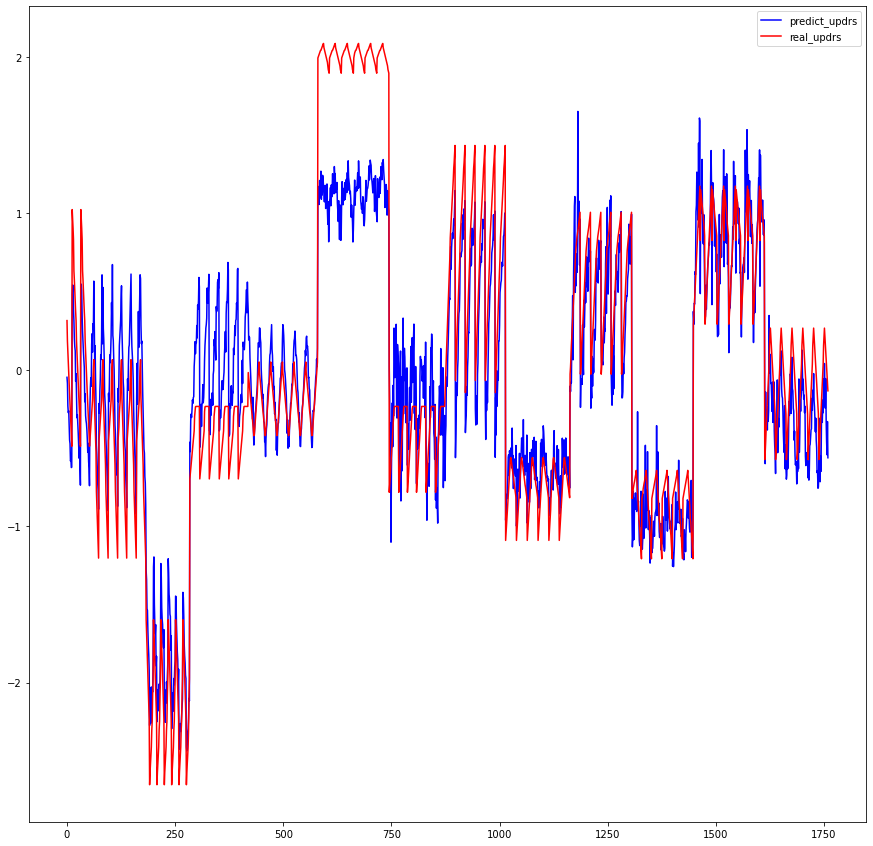

In [8]:
#motor_updrs
draw_figure(test_pred[:, 0], labels[:, 0])

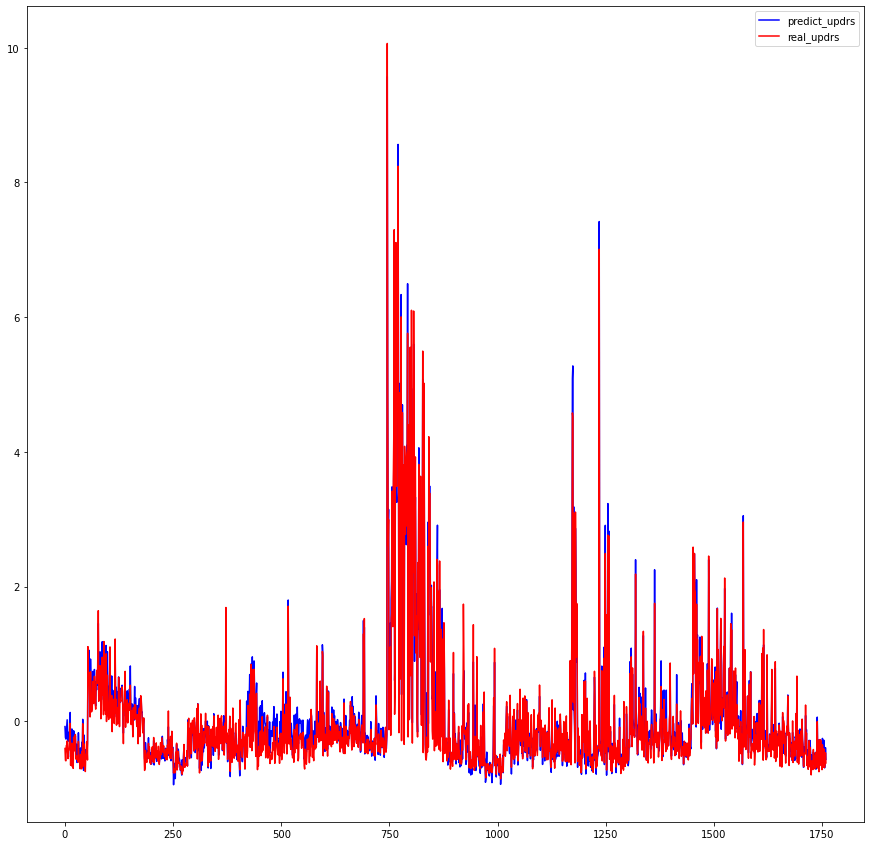

In [9]:
#total_updrs
draw_figure(test_pred[:, 1], labels[:, 1])